In [1]:
import pandas as pd
import numpy as mp
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df_2023 = pd.read_csv("vct_2023_agents_pick_rates.csv")

In [3]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16974 entries, 0 to 16973
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tournament  16974 non-null  object
 1   Stage       16974 non-null  object
 2   Match Type  16974 non-null  object
 3   Map         16974 non-null  object
 4   Agent       16974 non-null  object
 5   Pick Rate   16974 non-null  object
dtypes: object(6)
memory usage: 795.8+ KB


In [4]:
df_2023.head()

,Tournament,Stage,Match Type,Map,Agent,Pick Rate
0,Champions Tour 2023: EMEA Last Chance Qualifier,Playoffs,Knockout Round,All Maps,omen,67%
1,Champions Tour 2023: EMEA Last Chance Qualifier,Playoffs,Knockout Round,All Maps,skye,58%
2,Champions Tour 2023: EMEA Last Chance Qualifier,Playoffs,Knockout Round,All Maps,raze,58%
3,Champions Tour 2023: EMEA Last Chance Qualifier,Playoffs,Knockout Round,All Maps,breach,58%
4,Champions Tour 2023: EMEA Last Chance Qualifier,Playoffs,Knockout Round,All Maps,killjoy,58%


In [5]:
df_2023.isnull().sum()

Tournament    0
Stage         0
Match Type    0
Map           0
Agent         0
Pick Rate     0
dtype: int64

In [6]:
print(df_2023["Pick Rate"].dtype)

object


In [7]:
df_2023["Pick Rate"] = df_2023["Pick Rate"].str.rstrip('%').astype(float) 

In [8]:
df_2023["Stage"].value_counts()

Stage
Playoffs             6049
Regular Season       2668
Group Stage          2093
All Stages           1886
Main Event           1380
League Play          1219
Bracket Stage         851
Preliminary Stage     828
Name: count, dtype: int64

In [9]:
playoffs_stage = df_2023[df_2023["Stage"] == "Playoffs"]

In [10]:
average_pick_playoffs = playoffs_stage.groupby(['Tournament', 'Agent'])["Pick Rate"].mean()

average_pick_playoffs


Tournament                            Agent    
Champions Tour 2023: Americas League  astra        16.696970
                                      breach       22.272727
                                      brimstone    17.333333
                                      chamber       4.060606
                                      cypher        0.000000
                                                     ...    
Valorant Champions 2023               sage          0.000000
                                      skye         58.435897
                                      sova         28.743590
                                      viper        50.102564
                                      yoru          6.512821
Name: Pick Rate, Length: 184, dtype: float64

In [11]:
print(df_2023['Tournament'].unique())

['Champions Tour 2023: EMEA Last Chance Qualifier'
 'Champions Tour 2023: Pacific Last Chance Qualifier'
 'Champions Tour 2023: Americas Last Chance Qualifier'
 'Champions Tour 2023: Masters Tokyo'
 'Champions Tour 2023: Lock-In Sao Paulo' 'Valorant Champions 2023'
 'Champions Tour 2023: Champions China Qualifier'
 'Champions Tour 2023: Pacific League' 'Champions Tour 2023: EMEA League'
 'Champions Tour 2023: Americas League']


In [12]:
filter = 'Americas'

In [13]:
df_2023_filtered = df_2023[df_2023['Tournament'].str.contains(filter, na = False)]
df_2023['Tournament'] = df_2023_filtered['Tournament']

In [14]:
df_2023

,Tournament,Stage,Match Type,Map,Agent,Pick Rate
0,NaN,Playoffs,Knockout Round,All Maps,omen,67.0
1,NaN,Playoffs,Knockout Round,All Maps,skye,58.0
2,NaN,Playoffs,Knockout Round,All Maps,raze,58.0
3,NaN,Playoffs,Knockout Round,All Maps,breach,58.0
4,NaN,Playoffs,Knockout Round,All Maps,killjoy,58.0
...,...,...,...,...,...,...
16969,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,phoenix,0.0
16970,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,iso,0.0
16971,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,deadlock,0.0
16972,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,reyna,0.0


In [15]:
df_2023 = df_2023.dropna().reset_index(drop = True)
df_2023 = df_2023.drop(df_2023[df_2023['Map'] == 'All Maps'].index)
df_2023

,Tournament,Stage,Match Type,Map,Agent,Pick Rate
23,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,viper,100.0
24,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,skye,100.0
25,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,raze,100.0
26,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,omen,100.0
27,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,brimstone,0.0
...,...,...,...,...,...,...
3215,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,phoenix,0.0
3216,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,iso,0.0
3217,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,deadlock,0.0
3218,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,reyna,0.0


In [16]:
# df_2023['Pick Rate'] = pd.to_numeric(df_2023['Pick Rate'], errors='coerce')
average_pickrate = df_2023.groupby('Agent')["Pick Rate"].mean()
average_pickrate

Agent
astra        22.706897
breach       22.077586
brimstone    18.396552
chamber       4.663793
cypher        5.482759
deadlock      0.000000
fade          4.551724
gekko         2.301724
harbor       23.603448
iso           0.000000
jett         64.112069
kayo         18.267241
killjoy      70.318966
neon          5.948276
omen         36.224138
phoenix       0.396552
raze         42.034483
reyna         0.000000
sage          5.844828
skye         64.439655
sova         28.224138
viper        59.844828
yoru          0.646552
Name: Pick Rate, dtype: float64

In [17]:
average_pickrate_df = average_pickrate.reset_index(name='Average Pick Rate')
average_pickrate_df.sort_values(by= ['Average Pick Rate'], ascending = False, inplace = True)

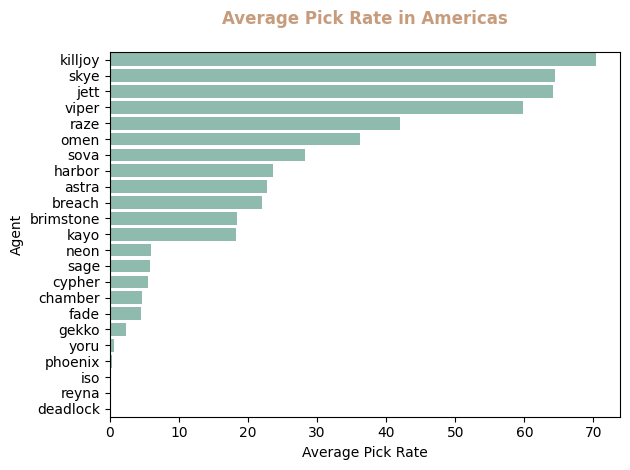

In [18]:
palette = ['#86c3b1']
sns.barplot(data=average_pickrate_df, y='Agent', x='Average Pick Rate', palette = palette)
plt.xlabel('Average Pick Rate')
plt.ylabel('Agent')
plt.title('Average Pick Rate in Americas', pad = 20, color = '#c79c7d', fontweight = 'bold')
plt.tight_layout()
plt.show()

In [19]:
df_2023

,Tournament,Stage,Match Type,Map,Agent,Pick Rate
23,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,viper,100.0
24,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,skye,100.0
25,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,raze,100.0
26,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,omen,100.0
27,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Lotus,brimstone,0.0
...,...,...,...,...,...,...
3215,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,phoenix,0.0
3216,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,iso,0.0
3217,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,deadlock,0.0
3218,Champions Tour 2023: Americas League,All Stages,All Match Types,Icebox,reyna,0.0


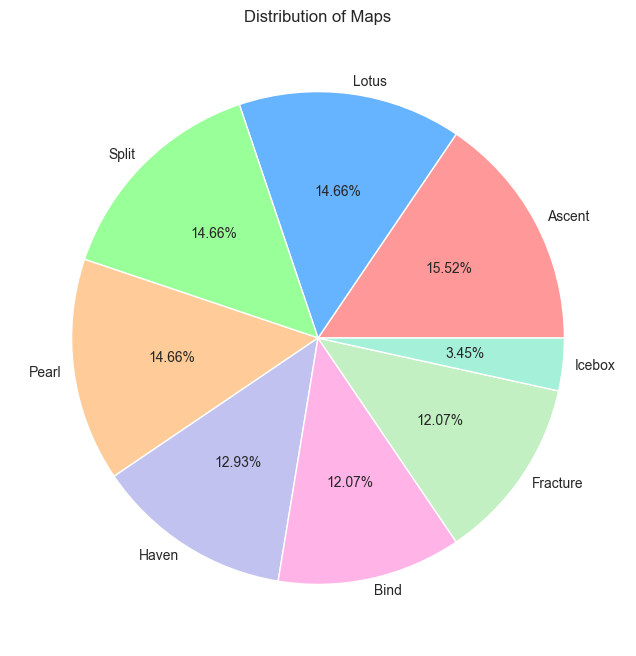

In [27]:
maps = df_2023['Map'].value_counts()
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")
eight_color_palette = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#c2f0c2", "#a4f0d9"]

plt.pie(maps.values, labels=maps.index, autopct='%0.2f%%', labeldistance = 1.05, colors = eight_color_palette)
plt.title('Distribution of Maps')
plt.show()
